In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
top2018 = pd.read_csv('./data/top2018.csv')
print('Print top 5 rows of the dataframe\n')
display(top2018.head())
print('\n\nDescriptive column view for the dataframe\n')
top2018.describe()

Print top 5 rows of the dataframe



,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0




Descriptive column view for the dataframe



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


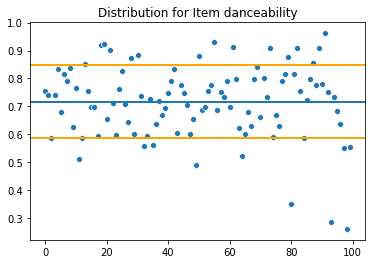

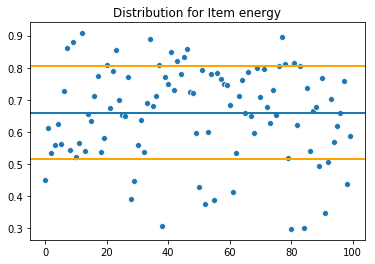

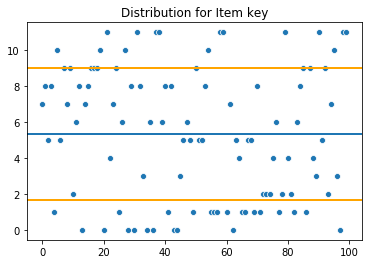

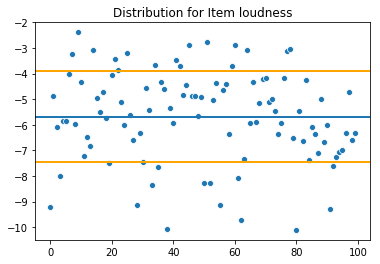

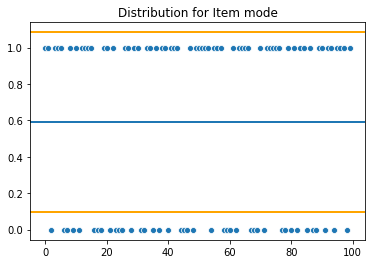

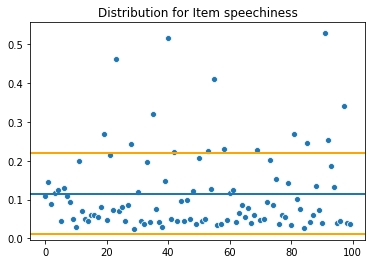

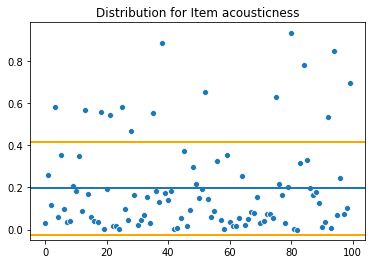

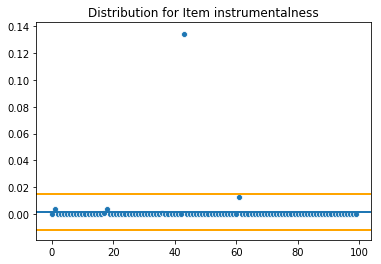

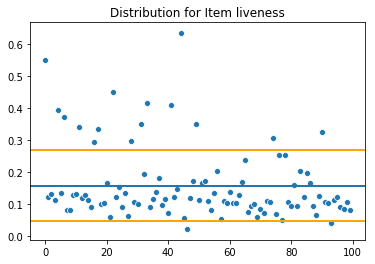

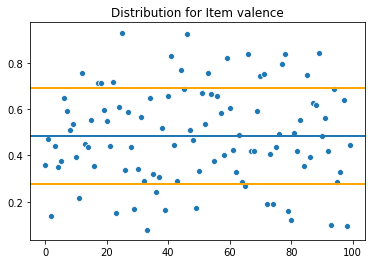

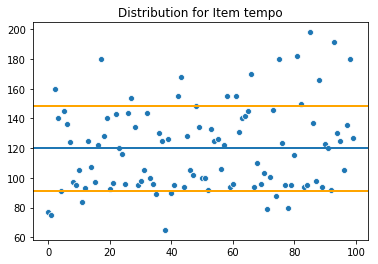

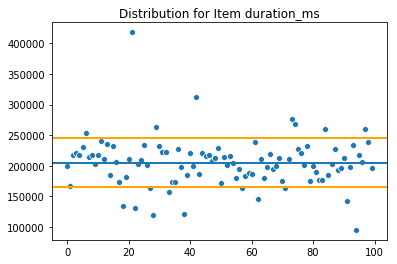

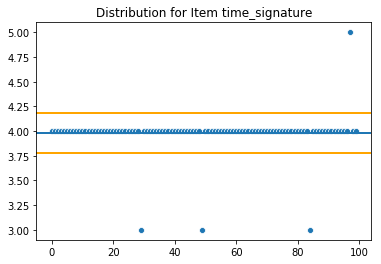

In [3]:
for i, col in enumerate(top2018._get_numeric_data()):
    m = top2018[col].mean()
    st = top2018[col].std()
    plt.figure(i)
    sns.scatterplot(data=top2018[col]).set_title('Distribution for Item {}'.format(col))
    plt.axhline(y=m, linewidth=2)
    plt.axhline(y=m+st, color = 'orange', linewidth=2)
    plt.axhline(y=m-st, color = 'orange', linewidth=2)

In [4]:
#Get number of songs falling within 1 standard deviation for each feature

cat_distribution = {}
for i, col in enumerate(top2018._get_numeric_data()):
    m = top2018[col].mean()
    st = top2018[col].std()
    cat_distribution[col] = [np.where((top2018[col] <= m+st) & (top2018[col] >= m-st))[0].size, m+st, m-st]

{'acousticness': [85, 0.4166477621105502, -0.02524512211055019],
 'danceability': [75, 0.8475301423750743, 0.5853898576249259],
 'duration_ms': [81, 245214.6734041519, 165198.8865958481],
 'energy': [71, 0.8041271610397103, 0.5139928389602899],
 'instrumentalness': [99, 0.015032381473938742, -0.011865208673938742],
 'key': [60, 9.006447011213766, 1.653552988786235],
 'liveness': [83, 0.2699639003777009, 0.04664009962229915],
 'loudness': [69, -3.900063057000674, -7.455216942999325],
 'mode': [59, 1.0843110704237102, 0.09568892957628966],
 'speechiness': [85, 0.22009600554344216, 0.011041994456557847],
 'tempo': [75, 148.70016363597313, 91.10819636402685],
 'time_signature': [96, 4.18, 3.78],
 'valence': [68, 0.6905881637472091, 0.278297836252791]}

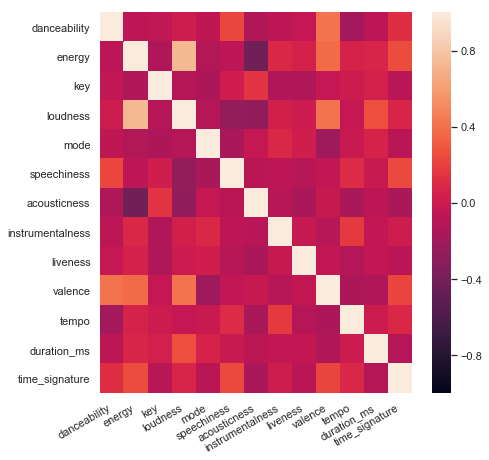

In [5]:
def Correlation_heat_map(df):
    sns.set(rc={'figure.figsize':(7,7)}, font_scale=1)
    ax = sns.heatmap(df.corr(), vmin = -1, vmax = 1)
    labels = [t.get_text() for t in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=30, horizontalalignment="right")
    

Correlation_heat_map(top2018)

In [6]:
def corr_feature(df, threshold):
    corr_data = df.corr().abs()
    upper = corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(np.bool))
    cor_col = {}
    for i in upper.columns:
        for j in upper.index:
            if upper[i][j] > threshold:
                cor_col[i] = j
    return cor_col

corr_feature(top2018, 0.5)

{'loudness': 'energy'}

In [7]:
#Get list of top performing artist by number of songs
songsperartist = top2018[['id','artists']].groupby(['artists']).agg('count').reset_index().sort_values('id', ascending = False)
songsperartist.head()

,artists,id
52,Post Malone,6
65,XXXTENTACION,6
21,Drake,4
24,Ed Sheeran,3
42,Marshmello,3


##Summary

From the all the analysis, the analysis on measure of songs parameter distrubution get me the most insightfull information. I could see most of the songs have quite similar range of time_signature, speechiness, acousticness, liveness. 

In [11]:
for k,v in cat_distribution.items():
    print("{}% of most heard track has {} in the range of {} to {}".format(v[0], k,  v[2], v[1]))

75% of most heard track has danceability in the range of 0.5853898576249259 to 0.8475301423750743
71% of most heard track has energy in the range of 0.5139928389602899 to 0.8041271610397103
60% of most heard track has key in the range of 1.653552988786235 to 9.006447011213766
69% of most heard track has loudness in the range of -7.455216942999325 to -3.900063057000674
59% of most heard track has mode in the range of 0.09568892957628966 to 1.0843110704237102
85% of most heard track has speechiness in the range of 0.011041994456557847 to 0.22009600554344216
85% of most heard track has acousticness in the range of -0.02524512211055019 to 0.4166477621105502
99% of most heard track has instrumentalness in the range of -0.011865208673938742 to 0.015032381473938742
83% of most heard track has liveness in the range of 0.04664009962229915 to 0.2699639003777009
68% of most heard track has valence in the range of 0.278297836252791 to 0.6905881637472091
75% of most heard track has tempo in the ran